In [2]:

import numpy as np
import matplotlib.pyplot as plt
import operator
import csv
import scipy.io
import time
import statsmodels.api as sm
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn import model_selection, svm, neural_network, naive_bayes, linear_model, neighbors
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
import seaborn as sns
from sklearn.svm import LinearSVC
%matplotlib inline
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import statsmodels.formula.api as smf
import sqlite3 as db

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import csv
import scipy.io
import time
import statsmodels.api as sm
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn import model_selection, svm, neural_network, naive_bayes, linear_model, neighbors
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
import seaborn as sns
from sklearn.svm import LinearSVC
%matplotlib inline
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import statsmodels.formula.api as smf
import sqlite3 as db

In [1]:
import pandas as pd
import sqlite3 as db
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('totaltimeserismonth0414.csv', header=0)
df.head(1)

,ID,Incident Type,Report Date,Offense Date,Report Hour of Day,Report Day of Week,Offense Hour of Day,Offense Day of Week,City,State,...,RDate,DRhour,DRmonth,Oyear,Omonth,Oday,Ryear,Rmonth,Rday,delay
0,220002476,Dcf Investigations,02/14/2020 01:30:00 PM,01/20/2020 08:00:00 PM,13,5,20,1,GAINESVILLE,FL,...,2020-02-14,2020-Feb-14 13,2020-Feb,2020,1,20,2020,2,14,24


In [4]:
df.shape

(156619, 37)

In [5]:
df=df.rename(columns={"Incident Type": "Incident_Type"})

In [6]:
df=df.rename(columns={'Report Day of Week': 'Report_Day_of_Week', 'Report Hour of Day':'Report_Hour_of_Day',
'Offense Hour of Day': 'Offense_Hour_of_Day', 'Offense Day of Week': 'Offense_Day_of_Week'})


In [8]:
import csv
df.to_csv(r'C:\Users\chunx\crime\totaltimeserismonth0414.csv', index = None, header=True)
df=pd.read_csv('totaltimeserismonth0414.csv', header=0)
df.head(1)


,ID,Incident_Type,Report Date,Offense Date,Report_Hour_of_Day,Report_Day_of_Week,Offense_Hour_of_Day,Offense_Day_of_Week,City,State,...,RDate,DRhour,DRmonth,Oyear,Omonth,Oday,Ryear,Rmonth,Rday,delay
0,220002476,Dcf Investigations,02/14/2020 01:30:00 PM,01/20/2020 08:00:00 PM,13,5,20,1,GAINESVILLE,FL,...,2020-02-14,2020-Feb-14 13,2020-Feb,2020,1,20,2020,2,14,24


In [9]:
df.columns

Index(['ID', 'Incident_Type', 'Report Date', 'Offense Date',
       'Report_Hour_of_Day', 'Report_Day_of_Week', 'Offense_Hour_of_Day',
       'Offense_Day_of_Week', 'City', 'State', 'Address', 'Latitude',
       'Longitude', 'Zip Code Boundaries', 'Location', '2010 Census Tracts',
       'Commission Districts', 'Gainesville Police Districts',
       'Florida Census Zip Codes', 'Gainesville Enterprise Zone Boundaries',
       'GPD Zones', 'Gainesville Fire Response Districts', 'OffenseDate',
       'ReportDate', 'ODate', 'DOhour', 'DOmonth', 'RDate', 'DRhour',
       'DRmonth', 'Oyear', 'Omonth', 'Oday', 'Ryear', 'Rmonth', 'Rday',
       'delay'],
      dtype='object')

In [10]:
conn = db.connect('df_trial.db')
#c = conn.cursor()
df.to_sql('df', conn, if_exists='replace', index=False)
pd.read_sql_query('SELECT * FROM df LIMIT 2', conn)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,ID,Incident_Type,Report Date,Offense Date,Report_Hour_of_Day,Report_Day_of_Week,Offense_Hour_of_Day,Offense_Day_of_Week,City,State,...,RDate,DRhour,DRmonth,Oyear,Omonth,Oday,Ryear,Rmonth,Rday,delay
0,220002476,Dcf Investigations,02/14/2020 01:30:00 PM,01/20/2020 08:00:00 PM,13,5,20,1,GAINESVILLE,FL,...,2020-02-14,2020-Feb-14 13,2020-Feb,2020,1,20,2020,2,14,24
1,220002482,Burglary to Residence,02/14/2020 04:38:50 PM,02/14/2020 01:00:00 PM,16,5,13,5,GAINESVILLE,FL,...,2020-02-14,2020-Feb-14 16,2020-Feb,2020,2,14,2020,2,14,0



Five random records from the `dfRDate` table:


,RDate,countRdate
1424,2014-11-25,24
2068,2016-08-30,48
2369,2017-06-27,48
564,2012-07-18,51
2301,2017-04-20,48


Text(0.5, 1.0, 'Time Series of Incident_Type counts by Report Date of search')

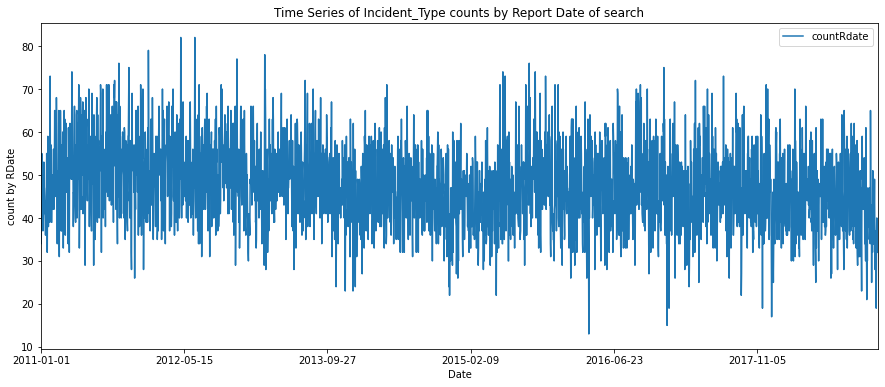

In [10]:
query = '''
    select  RDate, count(Incident_Type) as countRdate    
    from df 
     where Ryear!=2020 and Ryear!=2019
    group by RDate
    order by RDate
'''
dfRDate = pd.read_sql_query (query, conn)
### END SOLUTION

# Show your solution:
print ("\nFive random records from the `dfRDate` table:")
display(dfRDate.iloc[np.random.choice (len (dfRDate), 5)])
dfRDate.plot(x="RDate", y='countRdate', figsize=(15,6))
plt.xlabel('Date')
plt.ylabel('count by RDate')
plt.title('Time Series of Incident_Type counts by Report Date of search')


In [25]:
query = '''
    select  RDate, count(Incident_Type) as countRdate    
    from df 
    where Ryear=2020 or Ryear=2019
    group by RDate
    order by RDate
'''
testfull = pd.read_sql_query (query, conn)
### END SOLUTION



Five random records from the `dfDRmonth` table:


,DRmonth,countDRmonth
17,2012-Jul,1550
71,2016-Sep,1527
82,2017-Oct,1446
34,2013-Oct,1463
41,2014-Jul,1494


Text(0.5, 1.0, 'Time Series of Incident_Type counts by Report month of search')

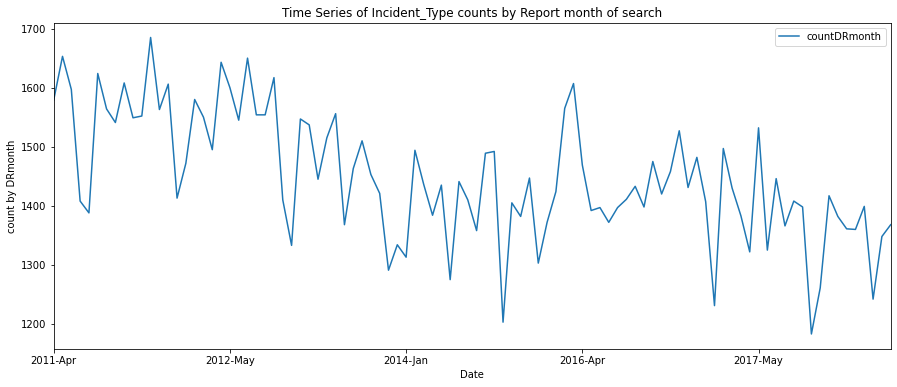

In [11]:
query = '''
    select  DRmonth , count(Incident_Type) as countDRmonth    
    from df 
    where Ryear!=2020 and Ryear!=2019    
    group by  DRmonth
    order by DRmonth
'''
dfDRmonth = pd.read_sql_query (query, conn)
### END SOLUTION

# Show your solution:
print ("\nFive random records from the `dfDRmonth` table:")
display(dfDRmonth.iloc[np.random.choice (len (dfDRmonth), 5)])
dfDRmonth.plot(x="DRmonth", y='countDRmonth', figsize=(15,6))
plt.xlabel('Date')
plt.ylabel('count by DRmonth')
plt.title('Time Series of Incident_Type counts by Report month of search')


In [10]:
dfDRmonth.head()

,DRmonth,countDRmonth
0,2011-Apr,1579
1,2011-Aug,1653
2,2011-Dec,1597
3,2011-Feb,1408
4,2011-Jan,1388


In [11]:
dfDRmonthindex=dfDRmonth.set_index('DRmonth')

In [12]:
dfDRmonthindex

,countDRmonth
DRmonth,
2011-Apr,1579
2011-Aug,1653
2011-Dec,1597
2011-Feb,1408
2011-Jan,1388
...,...
2018-Mar,1360
2018-May,1399
2018-Nov,1242


In [13]:
query = '''
    select  DRmonth , count(Incident_Type) as countDRmonth    
    from df 
    where Ryear=2020 or Ryear=2019
    
    group by  DRmonth
    order by DRmonth
'''
testmonth = pd.read_sql_query (query, conn)
### END SOLUTION


In [14]:
testmonth=testmonth.set_index('DRmonth')
#testmonth=testmonth.sort_index(ascending=True)

In [12]:
import matplotlib.pyplot as plt
from fbprophet import Prophet
import altair as alt
import chart_studio.plotly as plotly
def fit_predict_model(dataframe, interval_width = 0.99, changepoint_range = 0.8):
    m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
                seasonality_mode = 'multiplicative', 
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m = m.fit(dataframe)
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    return forecast

def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    #forecast['fact'] = df['y']

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    
    return forecasted
    
def plot_anomalies(forecasted):
    interval = alt.Chart(forecasted).mark_area(interpolate="basis", color = '#7FC97F').encode(
    x=alt.X('ds:T',  title ='date'),
    y='yhat_upper',
    y2='yhat_lower',
    tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive().properties(
        title='Anomaly Detection'
    )

    fact = alt.Chart(forecasted[forecasted.anomaly==0]).mark_circle(size=15, opacity=0.7, color = 'Black').encode(
        x='ds:T',
        y=alt.Y('fact', title='Incident_Type_count'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive()

    anomalies = alt.Chart(forecasted[forecasted.anomaly!=0]).mark_circle(size=30, color = 'Red').encode(
        x='ds:T',
        y=alt.Y('fact', title='Incident_Type_count'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper'],
        size = alt.Size( 'importance', legend=None)
    ).interactive()

    return alt.layer(interval, fact, anomalies)\
              .properties(width=870, height=450)\
              .configure_title(fontSize=20)


In [13]:
df0s=dfRDate.copy()
df0s=df0s.rename(columns={"RDate": "ds","countRdate": "y"})
pred = fit_predict_model(df0s)
pred = detect_anomalies(pred)
plot_anomalies(pred)


INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


alt.LayerChart(...)

In [14]:
df1s=dfDRmonth.copy()
df1s=df1s.rename(columns={"DRmonth": "ds", "countDRmonth": "y"})
pred = fit_predict_model(df1s)
pred = detect_anomalies(pred)
plot_anomalies(pred)

alt.LayerChart(...)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor r

<Figure size 1440x360 with 0 Axes>

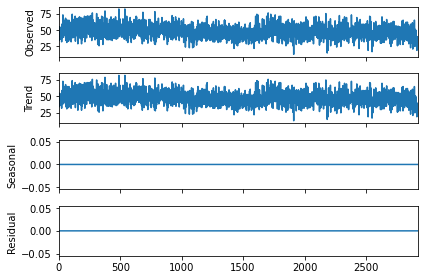

In [28]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df0s['y'], model='additive', freq=1)
plt.figure(figsize=(20,5))
result.plot()
pyplot.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor r

<Figure size 1440x360 with 0 Axes>

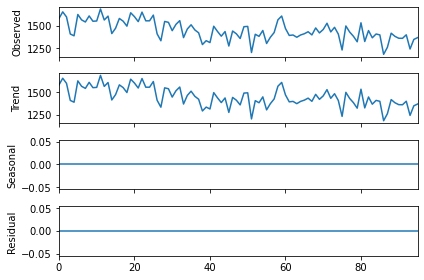

In [29]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df1s['y'], model='additive', freq=1)
plt.figure(figsize=(20,5))
result.plot()
pyplot.show()

In [30]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(3).mean()
    rolstd = timeseries.rolling(3).std()

    #Plot rolling statistics:
    plt.figure(figsize=(20,5), dpi=100)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xticks(rotation=90)
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [33]:
df0ss=df0s.set_index('ds')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

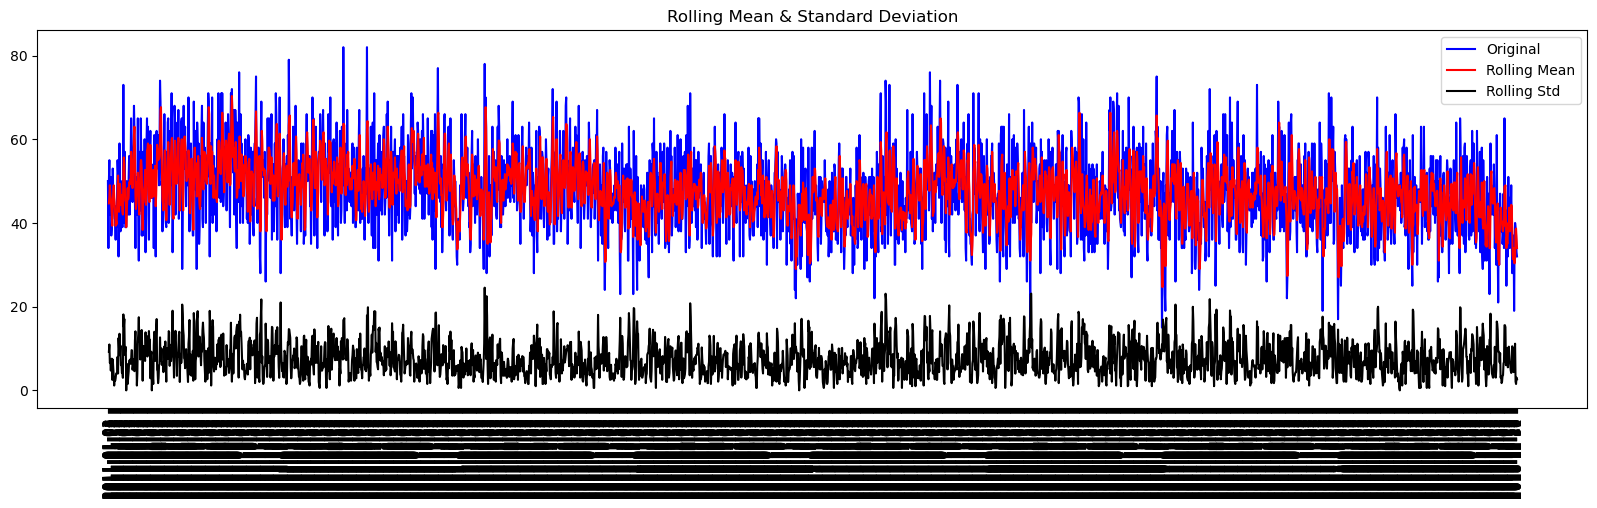

Results of Dickey-Fuller Test:
Test Statistic                   -4.648966
p-value                           0.000105
#Lags Used                       28.000000
Number of Observations Used    2893.000000
Critical Value (1%)              -3.432612
Critical Value (5%)              -2.862540
Critical Value (10%)             -2.567302
dtype: float64


In [35]:
#df1s=df1s.set_index('ds')
test_stationarity(df0ss['y'])
#This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series

In [37]:
df1ss=df1s.set_index('ds')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

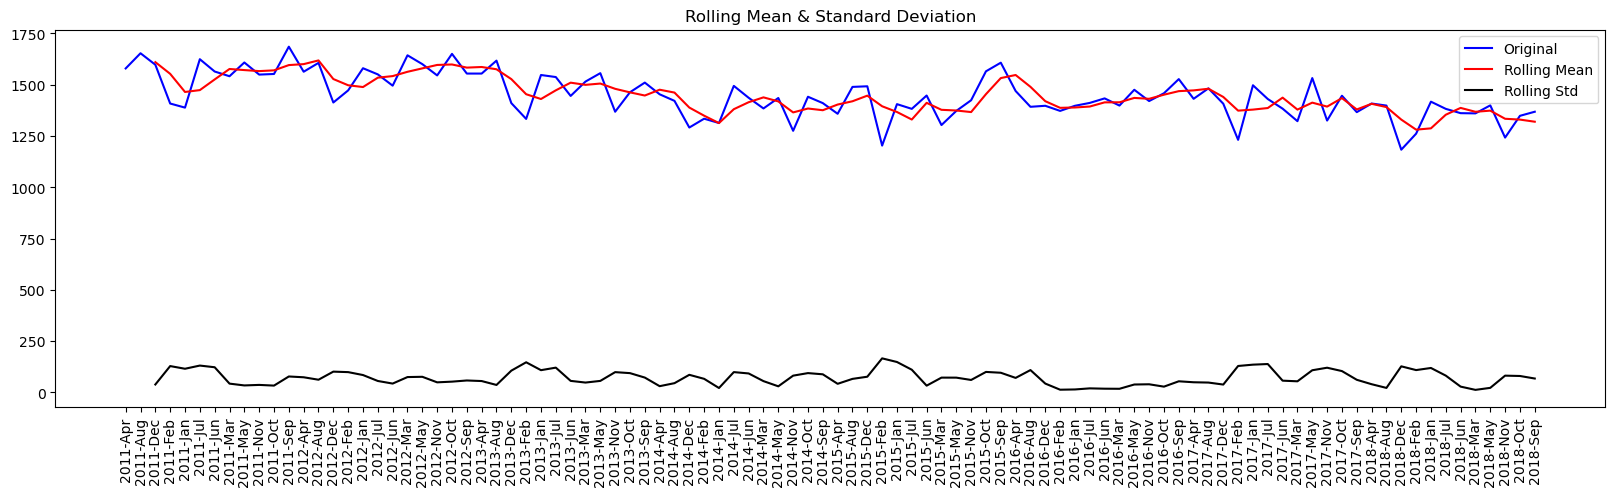

Results of Dickey-Fuller Test:
Test Statistic                 -0.921988
p-value                         0.780645
#Lags Used                     11.000000
Number of Observations Used    84.000000
Critical Value (1%)            -3.510712
Critical Value (5%)            -2.896616
Critical Value (10%)           -2.585482
dtype: float64


In [38]:
test_stationarity(df1ss['y'])

This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor r

<Figure size 2000x500 with 0 Axes>

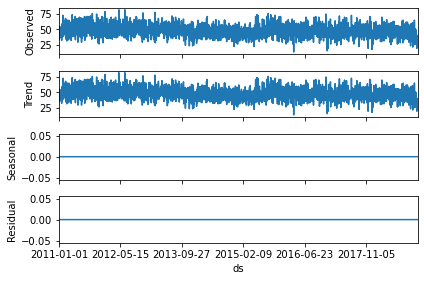

In [39]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df0ss['y'], model='additive', freq=1)
plt.figure(figsize=(20,5), dpi=100)
result.plot()
pyplot.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor r

<Figure size 2000x500 with 0 Axes>

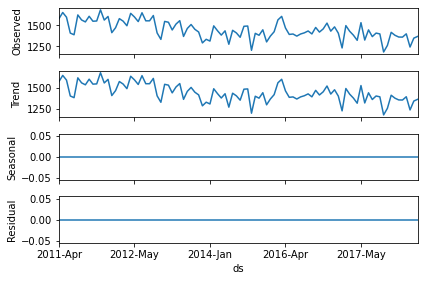

In [40]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1ss['y'], model='additive', freq=1)
plt.figure(figsize=(20,5), dpi=100)
result.plot()
pyplot.show()

In [41]:
train=dfDRmonthindex.copy()
test=testmonth.copy()
test=test.sort_index(ascending=True)
#test=test.drop('2020-Apr')

In [43]:
test=test.drop('2020-Apr')
test

,countDRmonth
DRmonth,
2019-Apr,1178
2019-Aug,1104
2019-Dec,1167
2019-Feb,1098
2019-Jan,1221
2019-Jul,1201
2019-Jun,1121
2019-Mar,1108
2019-May,1154


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If thes

                             ARIMA Model Results                              
Dep. Variable:         D.countDRmonth   No. Observations:                   95
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -557.691
Method:                       css-mle   S.D. of innovations             85.001
Date:                Tue, 14 Apr 2020   AIC                           1123.382
Time:                        13:58:08   BIC                           1133.597
Sample:                             1   HQIC                          1127.510
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.3981      0.886     -2.707      0.008      -4.134      -0.662
ar.L1.D.countDRmonth     0.1396      0.133      1.050      0.296      -0.121       0.400
ma.L1.D.coun

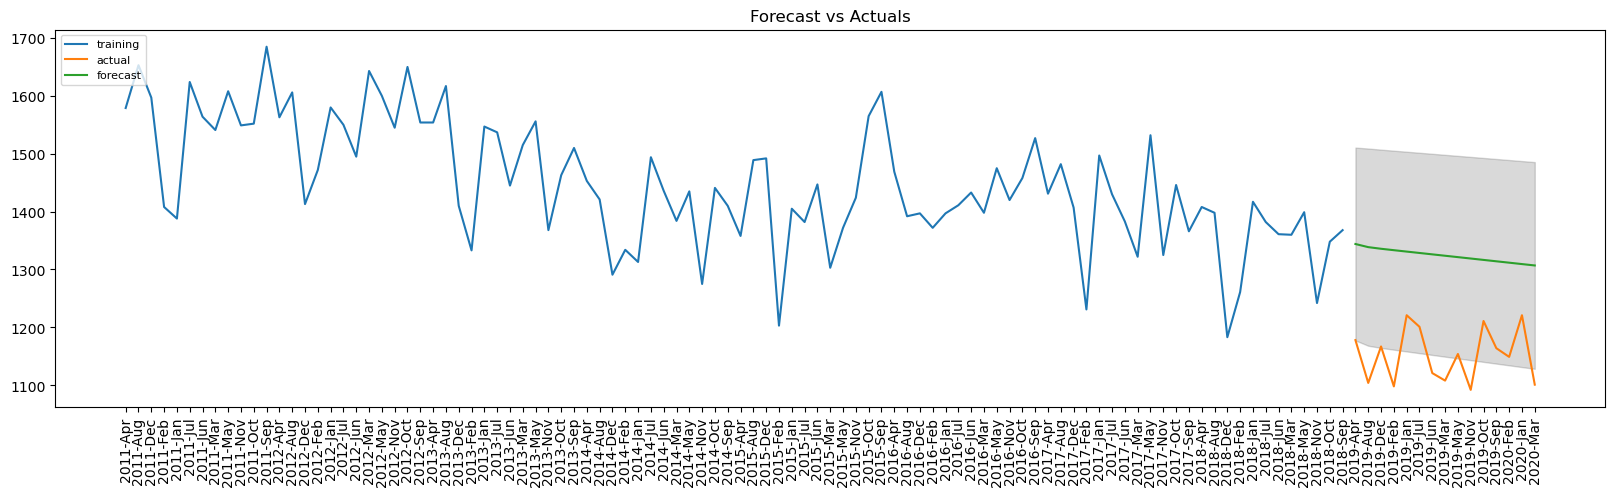

In [44]:
# Build Model
from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=False)  
print(fitted.summary())
# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xticks(rotation=90)
plt.show()


Test MSE: 31563.686


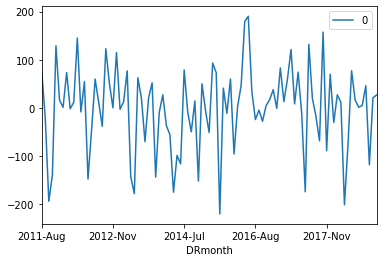

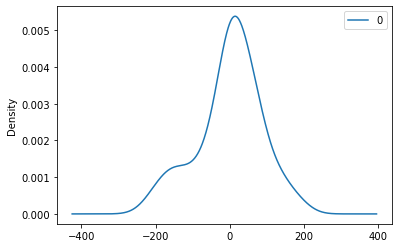

                0
count   95.000000
mean    -0.243927
std     86.376351
min   -219.864613
25%    -37.236584
50%     11.457591
75%     53.334260
max    190.187921


In [45]:
from sklearn.metrics import mean_squared_error
# plot residual errors
error = mean_squared_error(test, fc_series)
print('Test MSE: %.3f' % error)
residuals = pd.DataFrame(fitted.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [46]:
dfRDate=dfRDate.set_index('RDate')
testfull=testfull.set_index('RDate')
train=dfRDate.copy()
test=testfull.copy()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


                             ARIMA Model Results                              
Dep. Variable:           D.countRdate   No. Observations:                 2921
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10608.297
Method:                       css-mle   S.D. of innovations              9.136
Date:                Tue, 14 Apr 2020   AIC                          21224.595
Time:                        14:00:07   BIC                          21248.513
Sample:                    01-02-2011   HQIC                         21233.210
                         - 12-31-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0027      0.003     -0.806      0.420      -0.009       0.004
ar.L1.D.countRdate     0.1808      0.019      9.608      0.000       0.144       0.218
ma.L1.D.countRdate  

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

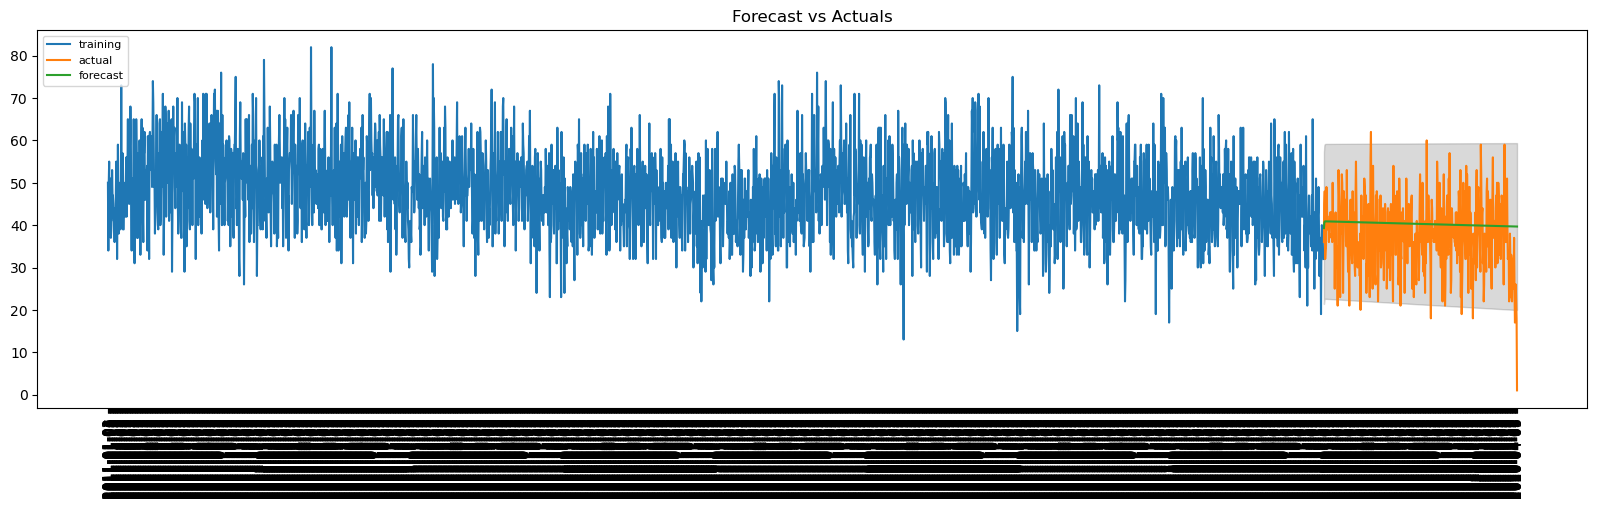

In [48]:
# Build Model
from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=False)  
print(fitted.summary())
# Forecast
fc, se, conf = fitted.forecast(465, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xticks(rotation=90)
plt.show()

Test MSE: 77.140


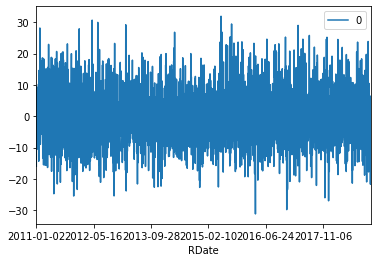

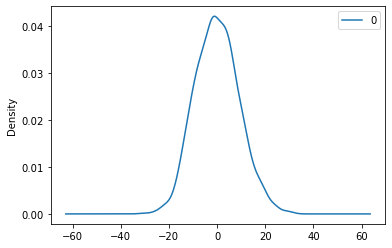

                 0
count  2921.000000
mean      0.037260
std       9.142542
min     -31.221183
25%      -6.461459
50%      -0.243229
75%       6.077730
max      31.940949


In [49]:
from sklearn.metrics import mean_squared_error
# plot residual errors
error = mean_squared_error(test, fc_series)
print('Test MSE: %.3f' % error)
residuals = pd.DataFrame(fitted.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.countDRmonth   No. Observations:                   97
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -423.753
Method:                       css-mle   S.D. of innovations             19.039
Date:                Mon, 13 Apr 2020   AIC                            861.507
Time:                        21:12:36   BIC                            879.530
Sample:                             1   HQIC                           868.794
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6843      0.824      0.830      0.409      -0.932       2.300
ar.L1.D.countDRmonth    -0.5506      0.106     -5.185      0.000      -0.759      -0.342
ar.L2.D.coun

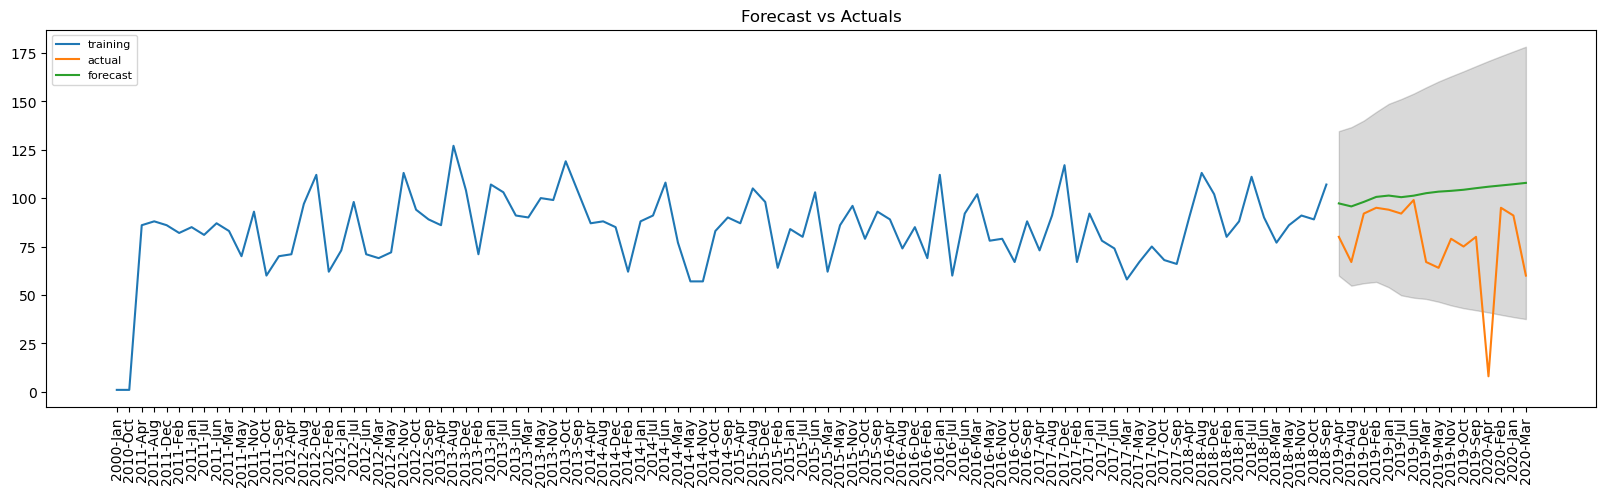

In [36]:
# Build Model
from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(5, 1, 0))  
fitted = model.fit(disp=False)  
print(fitted.summary())
# Forecast
fc, se, conf = fitted.forecast(16, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xticks(rotation=90)
plt.show()


Test MSE: 1155.890


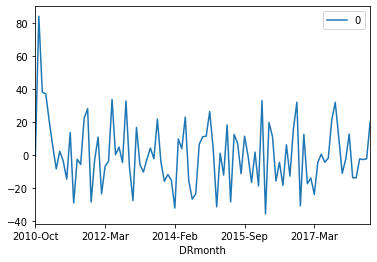

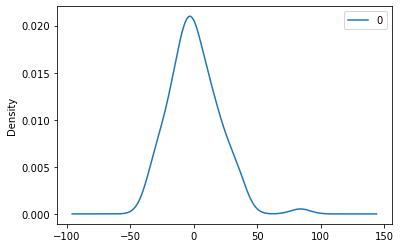

               0
count  97.000000
mean    0.615583
std    19.520878
min   -35.758331
25%   -12.842014
50%    -2.369504
75%    11.417001
max    84.093579


In [37]:
# plot residual errors
error = mean_squared_error(test, fc_series)
print('Test MSE: %.3f' % error)
residuals = pd.DataFrame(fitted.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

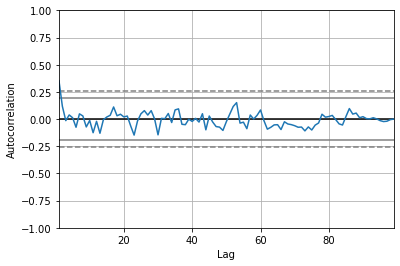

In [59]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train)
pyplot.show()